In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Bai 1

In [5]:
def kiemchunggioihan(n,k,loaipp):
    z = []
    if loaipp == 'binomial':
        _n = int(input("Nhap n: "))
        _p = float(input("Nhap p: "))
        for i in range(1,n+1):
            arr = np.random.binomial(_n,_p,k)
            zi = (arr.mean()-_n*_p)/(np.sqrt(_n)*_p)
            z.append(zi)
    sns.displot(z,kde=True)
    return plt.show()

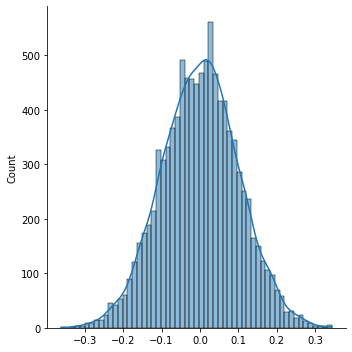

In [6]:
plt.figure(figsize=(10,5))
kiemchunggioihan(10000,100,'binomial')

# Bai 2

In [7]:
def linear_regression(x,y):
    # calc b0 b1
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1 = np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
    b0 = y_mean - b1*x_mean
    return b0,b1

In [8]:
from scipy.stats import t

In [9]:
def dubaohoiquy(x,y,x_0,confident):
    b0,b1 = linear_regression(x,y)
    y_mu = b0 + b1*x_0
    n = len(x)
    SST = sum(y**2) - sum(y)**2/n
    SSE = SST - b1*(sum(x*y) - sum(x)*sum(y)/n)
    sigma2 = SSE/(n-2)
    Sxx = sum(x**2) - sum(x)/n
    epsilon = t.ppf((1+confident)/2,n-2)*np.sqrt(sigma2*(1 + 1/n + (x_0 - np.mean(x))**2/Sxx))
    return y_mu,[y_mu-epsilon,y_mu+epsilon]

In [14]:
x = np.random.uniform(0,10,100)
y = 2*x + 3 + np.random.binomial(1,0.5,100)
dubao = dubaohoiquy(x,y,10,0.99)
print(dubao)

(23.55795691131308, [22.226286472483324, 24.88962735014284])
